# Linear Regression
Linear regression is a fundamental supervised learning algorithm used to model the relationship between a dependent variable $y$ and one or more independent variables $x$. In its simplest form (univariate linear regression), it assumes that the relationship between $x$ and $y$ is linear and can be described by the equation:

$$ \hat y = k \cdot x + d $$
$$ \hat y = w_0 + w_1 x_1 + w_2 x_2 … w_n x_n$$

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# Setup artificial data
num_points = 50
k = 3
d = 4

x = 2 * np.random.rand(num_points,1)

noise = np.random.normal(scale=0.8, size=x.shape)
y = d + k * x + noise

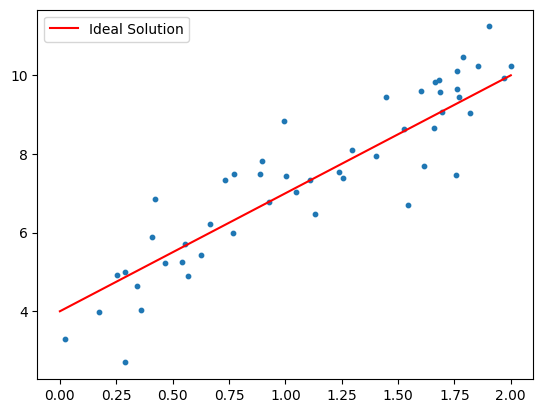

In [97]:
# Plot data
def plot_data():
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=10)
    ax.plot([0, 2], [d, 2 * k + d], color="red", label="Ideal Solution")
    ax.legend()
    return fig, ax

plot_data()
plt.show()

The model is trained by minimizing the mean squared error (MSE) between the predicted values and the actual targets:

$$MSE=\frac 1 n \sum_{i=1}^n (y_i−\hat y_i)^2$$

In [98]:
def mean_squared_error(y, y_hat):
    return np.sum((y - y_hat)**2)/ y.shape[0]

y_ideal = d + k * x

print("Mean Squared Error: ", mean_squared_error(y, y_ideal))

Mean Squared Error:  0.7505923385036507


Notice that even for the Ideal soltion we have some error, that is because your model will never be able to perfectly reconstruct the data, since we have introduced some gaussian noise.

Normally the values used to create the data are not avaliable. However luckily a closed form solution to find them exists exists. For this we first rewrite the formula a bit:

$$ \hat y = w_0 + w_1 x_1 + w_2 x_2 … w_n x_n$$
$$ \mathbf{\hat Y} = \mathbf{Xw}$$


* $\mathbf{X}$ is an $n \times (d+1)$ matrix, where each row corresponds to a sample, the first column consists of ones (to account for the intercept term $w_0$), and the remaining columns contain the feature values.
* $\mathbf{\hat Y}$ is an $n \times 1$ vector of the estimated target values.
* $\mathbf{w}$ is a $(d+1) \times 1$ vector of model parameters, including the intercept ($w_0$).

Mean Squared Error expressed as a Loss function with $w$ as a parameter then becomes:

$$J(\mathbf{w}) = \|\mathbf{y} - \mathbf{X} \mathbf{w}\|^2$$
$$= (\mathbf{y} - \mathbf{X} \mathbf{w})^T (\mathbf{y} - \mathbf{X} \mathbf{w})
$$

To minimize this quadratic function, we take the derivative with respect to $\mathbf{w}$ and set it to zero:

$$
\frac{\partial J}{\partial \mathbf{w}} = -2 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \mathbf{w}) = 0
$$

Rearranging gives the normal equation:

$$
\mathbf{X}^T \mathbf{X} \mathbf{w} = \mathbf{X}^T \mathbf{y}
$$

Provided $\mathbf{X}^T \mathbf{X}$ is invertible, the solution for $\mathbf{w}$ is:

$$
\boxed{
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
}
$$

In [99]:
ones = np.ones((x.shape[0], 1)) 
X = np.hstack((ones, x)) 

In [103]:
w = np.linalg.inv(np.matmul(X.T, X)).dot(X.T).dot(y)
Y_hat = X.dot(w)
mean_squared_error(y, Y_hat)

np.float64(0.7227020864943214)

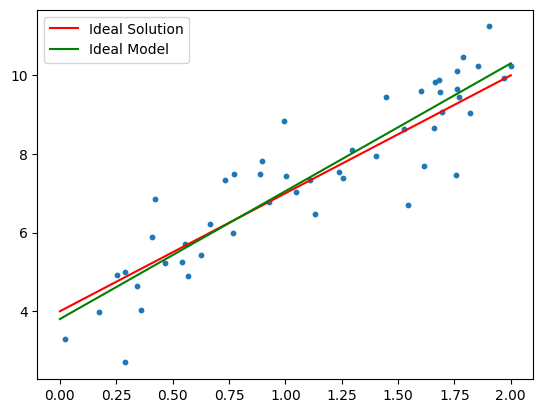

In [104]:
fig, ax = plot_data()
ax.plot([0,2], [w[0], w[1]*2 + w[0]], color="green", label="Ideal Model")
ax.legend()
plt.show()

## Example Using Real Data

We will use the **California Housing** dataset from `sklearn.datasets`. Instead of implementing linear regression manually, we'll leverage the built-in `LinearRegression` model from `sklearn.linear_model` for convenience and performance.

This example will demonstrate how to apply linear regression to real-world data and evaluate the model using metrics such as Mean Squared Error (MSE).


In [196]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Load dataset
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_test_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_hat)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.5558915986952444


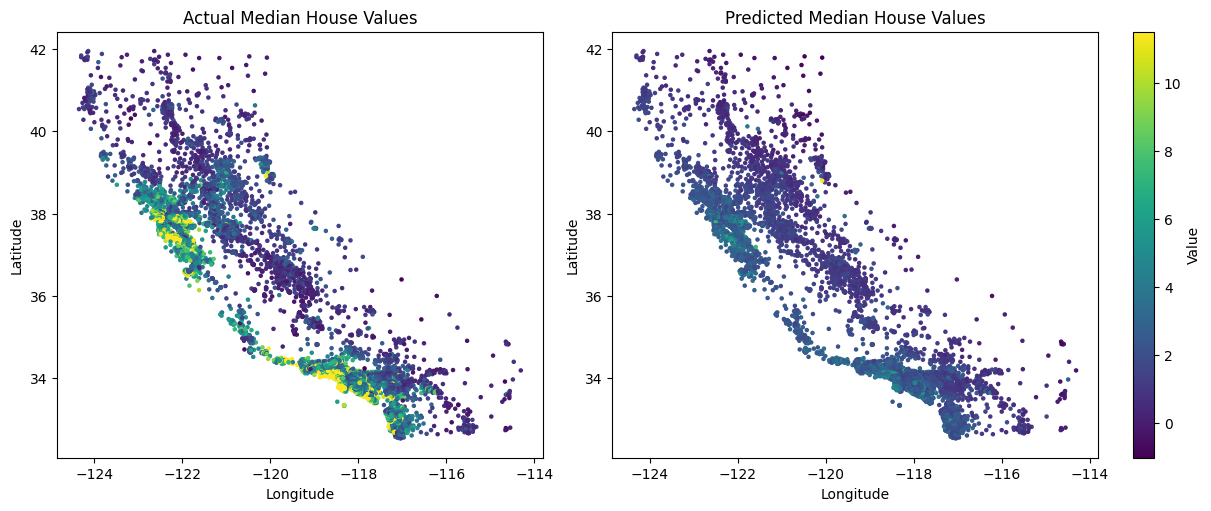

In [197]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), constrained_layout=True)

# First plot — true values
sc1 = ax1.scatter(df["Longitude"], df["Latitude"], c=df["MedHouseVal"], cmap="viridis", s=5)
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Actual Median House Values")

# Second plot — predicted values
sc2 = ax2.scatter(df["Longitude"], df["Latitude"], c=y_hat, cmap="viridis", s=5)
fig.colorbar(sc2, ax=ax2, label="Value")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_title("Predicted Median House Values")

plt.show()